# Nuclear Instrumentation
## ΔE-E Detector

Karina Chiñas Fuentes

Student Nummer: 02118434

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as spc
import pylab as pl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

qe = spc.elementary_charge # C
mp = spc.proton_mass       # kg
me = spc.electron_mass     # kg
ε0 = spc.epsilon_0         # F/m
c  = spc.speed_of_light    # m/s

**Task:** calcuate the energy loss of a given particle in a $\Delta$E-E detector, using the Bethe-Bloch formula: 

$$
    S_m(\beta) = S_{m,0}\frac{Z_x}{A_x}\left( \frac{Z^2_a}{\beta} \right)\left[ Ln\left( \frac{2m_ec^2\beta^2}{<I>}\right) -Ln\left( 1-\beta^2 \right) -\beta^2 \right]
$$

which express the stopping power in MeV$\cdot$cm$^2\cdot$g$^{-1}$. Where

$$
    S_{m,0} = 4\pi r_e^2 N_A m_e^2 c^2 \approx 0.307 \: \text{MeV}\cdot\text{cm}^2\cdot\text{g}^{-1}
$$

if $A_x$ is expressed in g$\cdot$mol$^{-1}$; with the approximation that, for all elements, $Z_x/A_x\sim$ 0.5. Furthermore, $r_e$ is the classical electron radius

$$
    r_e = \frac{e^2}{4\pi\epsilon_0 m_ec^2} 
$$

And, $m_e$ is the electron mass, $e$ the electron charge, $Z_x$ the atomic number of the absorber atoms, $Z_a$ is the atomic number of the incoming particle, $n_x$ is the number density of the absorber atoms, $\beta = \nu/c$, $\nu$ is the speed of the incoming particle, and $I$ is the average excitation or ionization potential of the absorber atoms. Finally, recall that

$$
    \nu^2 = \frac{2E}{m} \:\: \rightarrow \:\: \beta^2 = \frac{2E}{m_A \cdot 931 \frac{\text{MeV}}{\text{amu}}}
$$

With $m_A$ beng the particle mass ain atomic mass units, and $E$ the particle energy in MeV.

**Detector:**  The E detector is made of Ge with energy threshold of 5.2 MeV and thichkness of 11 mm. The $\Delta$E transmission detector is made of Si and its characteristics are _to be determined_ with the knowledge that **deuterons** need to have at least 13.3 MeV to be detected in the $\Delta$E-E detector. And, **protons** cannot be detected with energy above 60 MeV.

**Data:**

* **Silicon**
    * Ionisation potentials: 173 eV
    * Density: 2.32 g/cm$^3$
    * A: 28.0855 g/mol
    * Z: 14
    
* **Germanium**
    * Ionisation potentials: 350 eV
    * Density: 5.3 g/cm$^3$
    * A: 72.59 g/mol
    * Z: 32    

In [2]:
Sm0= 0.307e6                    # ev*cm2/g 
Si = {
    "ionization_potential":173, # eV
    "density":2.32,             # g/cm3
    "A":28.0855,                # atomic mass g/mol
    "Z":14,                     # atomic number
    "width": None,              # to be determined
    "I": None,                  # to be determined
}
Ge = {
    "ionization_potential":350, # eV
    "density":5.3,              # g/cm3
    "A":72.59,                  # atomic mass [g/mol]
    "Z":32,                     # atomic number
    "width": 1.1,               # cm
    "I": 5.2e6,                 # energy threshold[eV]
}

In [3]:
def beta_sq(E,mA):
    β_squared = 2*E/(931*mA)
    return β_squared

def BB_formula(Za,β_sq,Zx,Ax,I):
    mec2 = me*c*c/qe # rest mass in eV
    S = Sm0*(Zx/Ax)*((Za**2)/β_sq)*( np.log(2*mec2*β_sq/I ) -np.log(1-β_sq) -β_sq )
    S = S*1e-6 # so that output matches MeV units
    return S

The incoming particles are: **protons**, **deutrons** and **tritons**

In [4]:
Eo  = 10 #np.linspace(1,10) # Initial Energies in MeV
β2p = beta_sq(Eo,1) # Energy associated to protons
β2d = beta_sq(Eo,2) # Energy associated to deuterions
β2t = beta_sq(Eo,3) # Energy associated to tritions

Numerical analysis

In [5]:
d = 1.1  # detector width
N = 10   # grid partition
Δx = d/N

In [17]:
E = np.linspace(1,1000,200) # Initial Energies in MeV
β2p = beta_sq(E,1) 
S  = np.zeros(len(E))
ΔE = E.copy()

for j, beta in enumerate(β2p):
    for i in range(N):
        S[j] = BB_formula(1, beta, Ge["Z"], Ge["A"], Ge["I"])
        ΔE[j] -= S[j]*Δx

/tmp/ipykernel_35631/3013517797.py:7: RuntimeWarning: invalid value encountered in log
  S = Sm0*(Zx/Ax)*((Za**2)/β_sq)*( np.log(2*mec2*β_sq/I ) -np.log(1-β_sq) -β_sq )


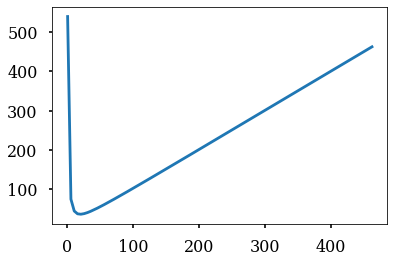

In [18]:
plt.plot(E,ΔE);

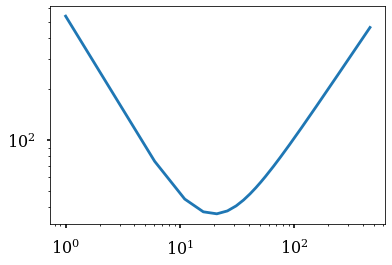

In [19]:
plt.loglog(E,ΔE)